In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'

# Import macaque NUMTs

In [10]:
mac3 = pd.read_table( 'numts_in_macaque/numts.rheMac3.bed', names=['Chrom','Start','End','Info','Score','Strand'] )
mac3['NUMT_Length'] = mac3['End'] - mac3['Start']
mac10 = pd.read_table( 'numts_in_macaque/numts.rheMac10.bed', names=['Chrom','Start','End','Info','Score','Strand'] )
mac10['NUMT_Length'] = mac10['End'] - mac10['Start']

In [11]:
mac3

,Chrom,Start,End,Info,Score,Strand,NUMT_Length
0,chr1,4021448,4021533,chrM:14707-14791|length=85|identity=85.882|nuc...,.,+,85
1,chr1,4023263,4023389,chrM:7631-7756|length=126|identity=90.476|nucl...,.,-,126
2,chr1,5627872,5627968,chrM:1123-1214|length=96|identity=80.208|nucle...,.,+,96
3,chr1,8653519,8653641,chrM:9450-9574|length=122|identity=74.400|nucl...,.,+,122
4,chr1,12724762,12724968,chrM:865-1067|length=206|identity=81.159|nucle...,.,+,206
...,...,...,...,...,...,...,...
825,chrX,126040441,126040564,chrM:540-663|length=123|identity=86.400|nuclea...,.,+,123
826,chrX,142645881,142647563,chrM:558-2227|length=1682|identity=73.052|nucl...,.,+,1682
827,chrX,142647810,142648102,chrM:2365-2653|length=292|identity=78.082|nucl...,.,+,292
828,chrX,142648528,142650116,chrM:2751-4374|length=1588|identity=70.165|nuc...,.,+,1588


In [12]:
mac10

,Chrom,Start,End,Info,Score,Strand,NUMT_Length
0,chr1,28459,28542,chrM:558-638|length=83|identity=78.571|nuclear...,.,-,83
1,chr1,6755338,6755544,chrM:15609-15814|length=206|identity=78.641|nu...,.,+,206
2,chr1,11109635,11114285,chrM:12147-16564|length=4409|identity=71.193|n...,.,+,4650
3,chr1,11115037,11120615,chrM:559-6150|length=5578|identity=75.970|nucl...,.,+,5578
4,chr1,13480773,13481863,chrM:9771-10875|length=1090|identity=72.572|nu...,.,+,1090
...,...,...,...,...,...,...,...
739,chrY,10530707,10531924,chrM:3868-5080|length=1217|identity=68.613|nuc...,.,+,1217
740,chrY,10543212,10544849,chrM:14359-16004|length=1637|identity=68.802|n...,.,+,1637
741,chrY,10545178,10545538,chrM:16302-16564|length=262|identity=70.301|nu...,.,+,360
742,chrY,10546205,10546638,chrM:536-968|length=433|identity=72.109|nuclea...,.,+,433


# Compare NUMT lengths (bp)

/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_28756/465530018.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,}'.format(int(tick)) for tick in plt.gca().get_yticks()])


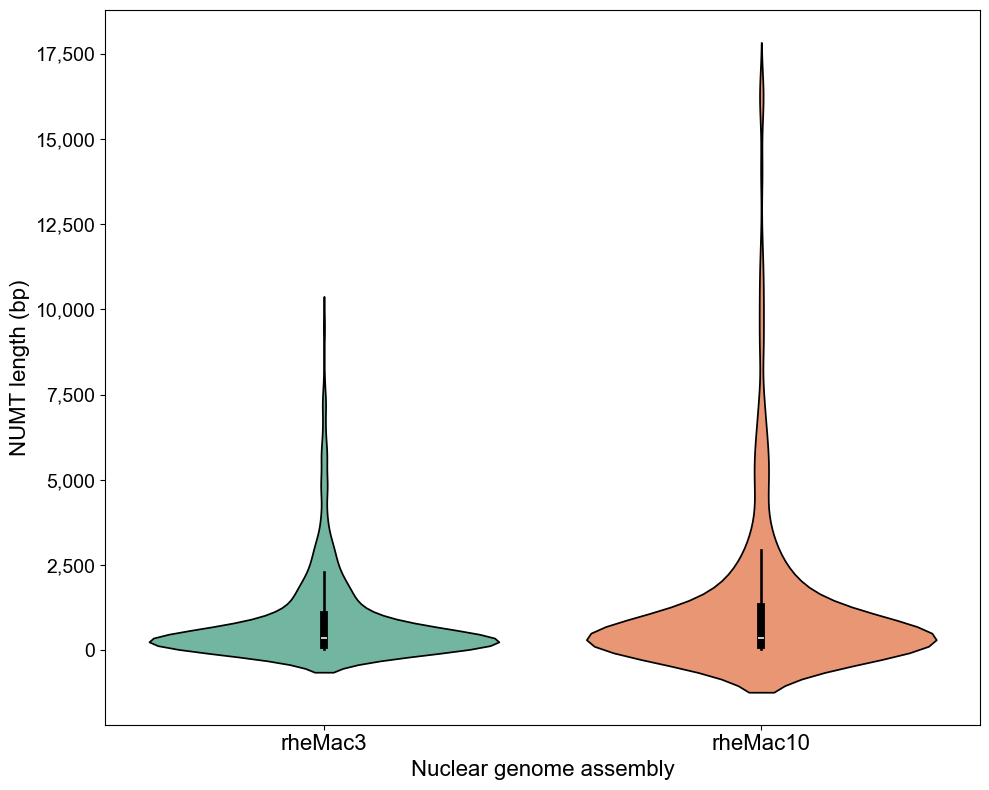

In [16]:
# Create a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'NUMT_Length': mac3['NUMT_Length'].tolist() + mac10['NUMT_Length'].tolist(),
    'Dataset': ['rheMac3'] * len(mac3) + ['rheMac10'] * len(mac10)
})

# Plot the boxplot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Dataset', y='NUMT_Length', data=comparison_df, hue='Dataset', palette="Set2", linecolor='black')

# Add title and labels with improved aesthetics
# plt.title('Comparison of NUMT_Length between mac3 and mac10', fontsize=18, fontweight='bold')
plt.xlabel('Nuclear genome assembly', fontsize=16)
plt.ylabel('NUMT length (bp)', fontsize=16)

# Customize the ticks
plt.xticks(fontsize=16,)
plt.yticks(fontsize=14)
plt.gca().set_yticklabels(['{:,}'.format(int(tick)) for tick in plt.gca().get_yticks()])

# Save the figure
plt.tight_layout()
plt.savefig('plots/png/figureS8_violinplot_numts_macaques.png')
plt.savefig('plots/pdf/figureS8_violinplot_numts_macaques.pdf')

# Show the plot
plt.show()